## Práctica 1

### Introducción a la práctica

### __Variables de entrada__
En esta sección se explicarán qué representan las variables del dataset con una descripción, el tipo de variable (e.g.,categórica, numerica... etc.) y los valores posibles que estas pueden tomar en caso de ser categóricas.


#### **Datos de los clientes del banco**
> **Descripción:** Las variables que caen bajo este subconjunto son aquellas que están relacionadas con los datos del clientes del banco. Estas variables evalúan distintos factores del cliente, como su empleo, background educativo, préstamos... etc.


- **age** (Tipo: numérico): Edad del cliente.


- **job** (Tipo: categórico): Representa el tipo de trabajo que realiza el cliente. (Valores posibles: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self employed","services","student","technician","unemployed","unknown")


- **marital** (Tipo: categórico): Estado marital de cliente. (Valores posibles: "divorced","married","single","unknown"; note: "divorced" significa divorciado/a o viudo/a)


- **education** (Tipo: categórico): Nivel de educación del cliente. (Valores posibles: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")


- **default** (Tipo: categórico): Variable que indica si el cliente ha tenido impagos. (Valores posibles: "no","yes","unknown")


- **housing** (Tipo: categórico): Variable que indica si el cliente tiene un préstamo hipotecario. (Valores posibles: "no","yes","unknown")


- **loan** (Tipo: categórico): Variable que indica si el cliente tiene un crédito a título personal. (Valores posibles: "no","yes","unknown")



#### **Información relacionada con el último contacto en campaña**
> **Descripción:** La información en este subconjunto representa, para la campaña actual de captación de clientes del banco, distintas métricas sobre los clientes del banco. Esto es, veces que han sido llamados, si el contacto ha sido por telefono o por móvil... etc


- **contact** (Tipo: categórico): Método de comunicación con el cliente (Valores posibles: "cellular","telephone") 


- **month** (Tipo: categórico): Mes donde se estableció el último contacto con el cliente. (Valores posibles: "jan", "feb", "mar", ..., "nov", "dec")


- **day_of_week** (Tipo: categórico): Día de la semana donde se estableción el último contacto con el cliente (Valores posibles: "mon","tue","wed","thu","fri")


- **duration** (Tipo: numérico): Duración del último contacto que se tuvo con el cliente, en segundos. **Nota importante**: Este atributo afecta directamente a la clase que se está intentando predecir (e.g., if duration=0 then y="no"), siendo "y" el output a predecir. Esto quiere decir que, en un principio, este atributo es redundante, ya que, si todavía no se ha hecho una llamada al usuario una vez es cliente, la duración es 0, lo cual no es relevante. Este atributo por tanto, no debe ser considerado en caso de querer realizar un modelo predictvo.



#### **Otros atributos**
> **Descripción:** Otros atributos referentes a los clientes, como campañas del banco para la captación del cliente, días desde el último contacto con el cliente, resultados de la captación de clientes... etc.


- **campaign** (Tipo: numérico): Número de veces que se ha contactado al cliente en la campaña, incluído el último contacto. 


- **pdays** (Tipo: numérico): número de días que han pasado desde la última vez que se contacto al cliente en campaña. (numeric; - **Nota:** Si el valor es 999, significa que el cliente no ha sido contactado previamente)


- **previous** (Tipo: numérico): Cantidad de contactos realizados a dicho cliente antes de que empezase la campaña. 


- **poutcome** (Tipo: categórico): Resultado del marketing de la campaña. Basicamente, si se ha tenido éxito a la hora de captar al cliente en la campaña. (Valores posibles: "failure","nonexistent","success")



#### **Atributos socio-económicos**

> **Descripción**: Atributos no relevantes a los clientes ***per se***, si no mas bien a lo que rodea a dichos clientes, como pueden ser métricas o índices económicos.


- **emp.var.rate** (Tipo: numérico): Ratio de variación del empleo - ***Indicador cuatrimestral***. Indica la variación de la cantidad de personas están siendo despedidas y contratas en un intervalo de tiempo. Esta es una métrica que indica cómo de estables son los trabajos en el momento de análisis.


- **cons.price.idx (IPC)** (Tipo: numérico): Índices de precios al consumidor - ***monthly indicator***. Indice económico que evalúa el precio de un conjunto de bienes de primera necesidad(e.g., alimentos del hogar) estudiando si estos son mayor o menormente accesibles en base a las encuestas de los gastos de los hogares (donde a ***grosso modo*** se evalúa si vivir sale más caro o mas barato). Este valor es representado por un porcentaje, donde si el valor sale positivo, significa que ha habido un aumento de los precios y negativo, en caso de que hayan bajado.


- **cons.conf.idx** (Tipo: numérico): Índice de confianza del consumidor - ***monthly indicator***. Representa la confianza de crecimiento ecónomico que deposita el consumidor, esto se traduce en lo siguiente: si el consumidor esta consumiendo mas, significa un mayor consumo, lo que indica un crecimiento económico.


- **euribor3m**  (Tipo: numérico): Euribor a 3 meses rate - ***daily indicator***. Muestra el euribor a 3 meses. El Euribor es un ratio que mide la media de los intereses de los préstamos (excluyendo el 15% mas alto y bajo) que los bancos europeos se ceden entre sí. A mayor euribor, mayores intereses y por lo tanto, pedir prestamos sale mas caro, lo mismo ocurirrá de manera contraria.


- **nr.employed** (Tipo: numérico): número de empleados - ***quarterly indicator***.


### __Variable de salida (target):__
- **y** (Tipo: binario): ¿Se ha hecho el cliente un depósito a plazos en el banco? (Valores posibles: "yes","no")

#### Importación de las librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### Cargamos el dataset

In [2]:
filename = 'bank-additional-full.csv'
missing_values = ['unknown', 'nonexistent']
df = pd.read_csv(filename, delimiter = ';', na_values = missing_values )
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,yes


##### Análisis de los missing values

In [3]:
# Identifiquemos los missing values
df_nas = pd.isna(df)
for col in df_nas.columns:
        nas = sum(df_nas[col])
        print(f'{col}:{nas} NA : {100*nas/len(df_nas[col])}%')

withNa = sum(df_nas.apply(any, axis=1))
print(f'El número total de registros con valor NA es: {withNa}, {withNa/len(df_nas)*100}%')

age:0 NA : 0.0%
job:330 NA : 0.8012042342429834%
marital:80 NA : 0.1942313295134505%
education:1731 NA : 4.202680392347285%
default:8597 NA : 20.872584247839175%
housing:990 NA : 2.40361270272895%
loan:990 NA : 2.40361270272895%
contact:0 NA : 0.0%
month:0 NA : 0.0%
day_of_week:0 NA : 0.0%
duration:0 NA : 0.0%
campaign:0 NA : 0.0%
pdays:0 NA : 0.0%
previous:0 NA : 0.0%
poutcome:35563 NA : 86.3431096435855%
emp.var.rate:0 NA : 0.0%
cons.price.idx:0 NA : 0.0%
cons.conf.idx:0 NA : 0.0%
euribor3m:0 NA : 0.0%
nr.employed:0 NA : 0.0%
y:0 NA : 0.0%
El número total de registros con valor NA es: 36536, 88.70544818879286%


#### Normalización y transformación de los datos

In [4]:
# En primer lugar, realicemos una tranformación sobre los datos categóricos (codificación),
df['housing'] = df['housing'].replace(['yes','no'],[1,0])
df['marital'] = df['marital'].replace(['married','single','divorcied'], [2, 1, 0])
df['loan'] = df['loan'].replace(['yes','no'],[0,1])
df['contact'] = df['contact'].replace(['telephone','cellular'], [0,1])
df['poutcome'] = df['poutcome'].replace(['failure', 'success'], [0,1])
df['day_of_week'] = df['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'],[1,2,3,4,5])
df['month'] = df['month'].replace(['mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec', ],[1,2,3,4,5,6,7,8,9,10])
df['education'] = df['education'].replace(['illiterate','basic.4y','basic.6y','basic.9y', 'high.school',   'professional.course',  'university.degree'], [0,1,2,3,4,5,6])
df['job'] = df['job'].replace(['unemployed','student','retired','housemaid', 'blue-collar', 'technician','self-employed','services', 'admin.','management','entrepreneur'],[1,2,3,4,5,6,7,8,9,10,11])
df['y'] = df['y'].replace(['yes','no'],[1,0])
df['pdays'] = df['pdays'].replace([999],['NaN'])

In [5]:
#Normalizaremos los datos que adoptan un conjunto de valores continuos en el espectro y 
#que abarcan un amplio intervalo. Todo esto lo hacemos para que el posterior análisis sea más sencillo.
#Aplicaremos la normalización mínimo-máximo

def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

df['duration'] = minmax_norm(df['duration'])
df['euribor3m'] = minmax_norm(df['euribor3m'])
df['cons.conf.idx'] = minmax_norm(df['cons.conf.idx'])

#### Correlación y falsos predictores

In [6]:
#Veamos si existe algún tipo de correlación entre las variables numéricas de nuestro dataset
df_new = df[['duration', 'campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
correlation  = df_new.corr()
correlation

,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
duration,1.000000,-0.071699,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,-0.071699,1.000000,0.150754,0.127836,-0.013733,0.135133,0.144095
emp.var.rate,-0.027968,0.150754,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.005312,0.127836,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,-0.008173,-0.013733,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,-0.032897,0.135133,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.044703,0.144095,0.906970,0.522034,0.100513,0.945154,1.000000


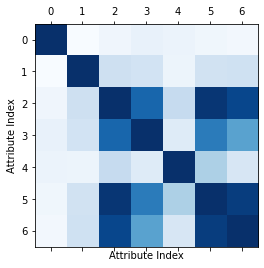

In [7]:
#graficamente la matriz de dispersión
plt.figure()
plt.matshow(correlation, fignum=1, cmap=plt.cm.Blues)
plt.ylabel("Attribute Index")
plt.xlabel("Attribute Index")
plt.show()

In [8]:
#Existe una correlación entre el euribor3m y el nr.employed,
# entre el euribor3m y emp.var.rate y entre emp.var.rate y nr.employed.

#Por lo que podemos definir una tabla reducida obviando el emp.var.rate y nr.employed
df_red = df.drop(['emp.var.rate', 'nr.employed'], axis = 1)
df_red

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,4.0,2,1.0,no,0.0,1.0,0,3,1,0.053070,1,NaN,0,NaN,93.994,0.60251,0.957379,0
1,57,8.0,2,4.0,NaN,0.0,1.0,0,3,1,0.030297,1,NaN,0,NaN,93.994,0.60251,0.957379,0
2,37,8.0,2,4.0,no,1.0,1.0,0,3,1,0.045954,1,NaN,0,NaN,93.994,0.60251,0.957379,0
3,40,9.0,2,2.0,no,0.0,1.0,0,3,1,0.030704,1,NaN,0,NaN,93.994,0.60251,0.957379,0
4,56,8.0,2,4.0,no,0.0,0.0,0,3,1,0.062424,1,NaN,0,NaN,93.994,0.60251,0.957379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,3.0,2,5.0,no,1.0,1.0,1,9,5,0.067914,1,NaN,0,NaN,94.767,0.00000,0.089322,1
41184,46,5.0,2,5.0,no,0.0,1.0,1,9,5,0.077877,1,NaN,0,NaN,94.767,0.00000,0.089322,0
41185,56,3.0,2,6.0,no,1.0,1.0,1,9,5,0.038430,2,NaN,0,NaN,94.767,0.00000,0.089322,0
41186,44,6.0,2,5.0,no,0.0,1.0,1,9,5,0.089874,1,NaN,0,NaN,94.767,0.00000,0.089322,1


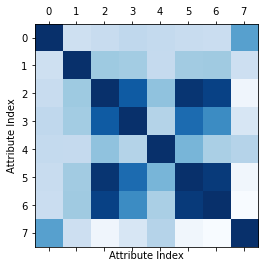

In [9]:
# Determinemos si hubiese falsos predictores
#Para esto vamos a ver si alguna de los atributos numéricos tiene influye 
#decisivamente sobre la salida. De existir una fuerte correlación, habría que analizar
#si se tratase o no se un falso predictor.

#Para comprobarlo graficamente vamos a añadir a la matriz de correlación anterior la salida "y". 
df_pred = df[['duration', 'campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']]
correlation_pred  = df_pred.corr()
plt.figure()
plt.matshow(correlation_pred, fignum=1, cmap=plt.cm.Blues)
plt.ylabel("Attribute Index")
plt.xlabel("Attribute Index")
plt.show()
#Tal y como se observa en la matriz, no hay ninguna correlación fuerte entre las variables de entrada y de salida
#por lo que podemos concluir que no existen falsos predictores.

#### Análisis de los distintos estadísticos

In [10]:
#Los principales valores estadisticos,
df.describe()

,age,job,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,40858.000000,39457.000000,40198.000000,40198.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,5625.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,6.844314,4.160935,0.536743,0.844569,0.634748,4.607896,2.979581,0.052518,2.567593,0.172963,0.244089,0.081886,93.575664,0.430854,0.677237,5167.035911,0.112654
std,10.42125,2.390499,1.638896,0.498654,0.362319,0.481507,2.040998,1.411514,0.052720,2.770014,0.494901,0.429584,1.570960,0.578840,0.193648,0.393210,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,0.000000,0.000000,4963.600000,0.000000
25%,32.00000,5.000000,3.000000,0.000000,1.000000,0.000000,3.000000,2.000000,0.020740,1.000000,0.000000,0.000000,-1.800000,93.075000,0.338912,0.160961,5099.100000,0.000000
50%,38.00000,6.000000,4.000000,1.000000,1.000000,1.000000,4.000000,3.000000,0.036600,2.000000,0.000000,0.000000,1.100000,93.749000,0.376569,0.957379,5191.000000,0.000000
75%,47.00000,9.000000,6.000000,1.000000,1.000000,1.000000,6.000000,4.000000,0.064864,3.000000,0.000000,0.000000,1.400000,93.994000,0.602510,0.980957,5228.100000,0.000000
max,98.00000,11.000000,6.000000,1.000000,1.000000,1.000000,10.000000,5.000000,1.000000,56.000000,7.000000,1.000000,1.400000,94.767000,1.000000,1.000000,5228.100000,1.000000


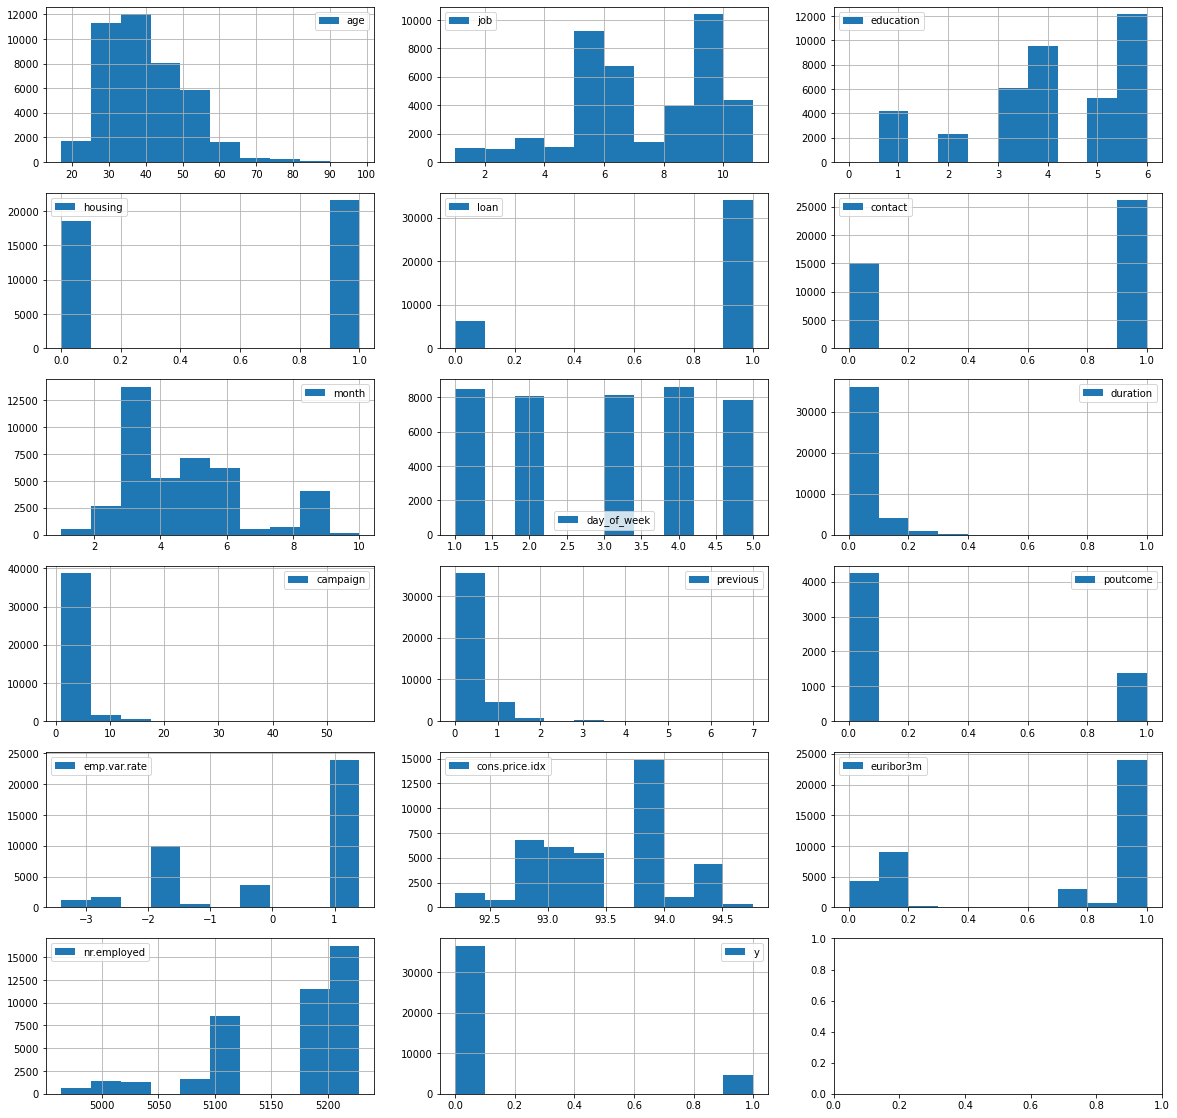

In [13]:
#Veamos los histogramas para mis variables,
columns = [
    'age',
    'job',
    'education',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'duration',
    'campaign',
    'previous',
    'poutcome',
    'emp.var.rate',
    'cons.price.idx',
    'euribor3m',
    'nr.employed',
    'y'
    
]

fig, axs = plt.subplots(6,3, figsize = (20,20))
for n, col in enumerate(columns):
    i,j = n//3, n%3
    df[col].hist(ax = axs[i,j])

#### Detección de outliers

In [28]:
cols = ['age',
    'job',
    'loan',
    'duration',
    'previous',
    'poutcome',
    'emp.var.rate',
    'cons.price.idx',
    'euribor3m',
    'nr.employed',
]
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols]<(Q1- 1.5*IQR))| (df[cols]>(Q3+1.5*IQR))).any(axis=1)]
print(f'El número total de outliers en el dataframe es: {df.shape[0] }')

El número total de outliers en el dataframe es: 10499
